# Electric dipole

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, ArrowStyle
import matplotlib.ticker as plticker
import scipy.constants as constants

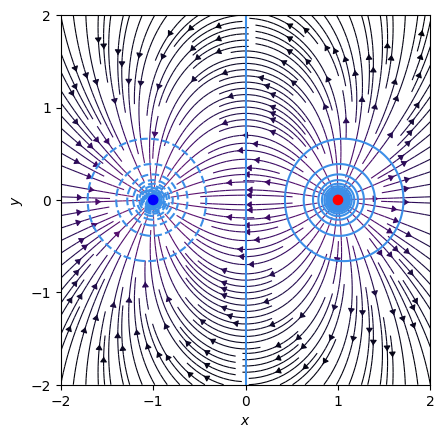

In [2]:
a = 1 # distance
scaling_factor = 1000 # to prevent number being too small to plot properly
q = constants.e
multiplier = q / (4 * np.pi * constants.epsilon_0) * scaling_factor

def E(x, y):
    """Returns a vector E=(Ex,Ey) for the electric field at position (x,y).
    E is the negative gradient of the potential phi and was calculated by hand.
    """
    cube_negative = ((x-a)**2 + y**2)**(3/2)
    cube_plus = ((x+a)**2 + y**2)**(3/2)
    x_component = ((x+a) / cube_plus) - ((x-a) / cube_negative)
    y_component = (y / cube_plus) - (y / cube_negative)
    return (multiplier * x_component, multiplier * y_component)

def phi(x, y):
    """Returns a scalar indicating the potential at point (x,y)."""
    term_first = 1 / (np.sqrt((x-a)**2 + y**2))
    term_second = 1 / (np.sqrt((x+a)**2 + y**2))
    return multiplier * (term_first - term_second)


# Grid of points
nx, ny = 2**10, 2**10
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x,y)

# Calculate E field on every grid point
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
delX, delY = E(x=X, y=Y)
Ex += delX
Ey += delY


# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

slope = np.hypot(Ex, Ey)
color = 3 * np.log(slope)
my_arrow_style = ArrowStyle("<|-", head_length=.3, head_width=.2)
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=0.8, cmap=plt.cm.inferno,
              density=2, arrowstyle=my_arrow_style, arrowsize=1, broken_streamlines=True)

# Plot the equipotential lines
plt.contour(X, Y, phi(X, Y), 1000, colors='#3c8fe8')

charge_colors = ['red', 'blue']
for i, pos in enumerate([(a, 0), (-a, 0)]):
    ax.add_patch(Circle(pos, 0.05, color=charge_colors[i], zorder=2))


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_aspect('equal')

plt.savefig('01-dipol.pdf')

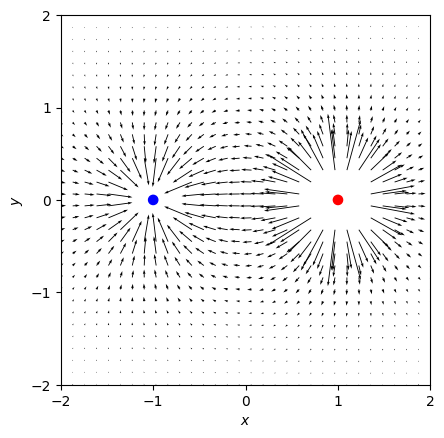

In [10]:
# Grid of points
nx, ny = 2**5, 2**5
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x,y)
# filter right side
keep_condition = (X-a)**2 + Y**2 > 0.1
X = X[keep_condition]
Y = Y[keep_condition]
# filter left side
keep_condition = (X+a)**2 + Y**2 > 0.2
X = X[keep_condition]
Y = Y[keep_condition]

# Calculate E field on every grid point
# Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
Ex, Ey = E(x=X, y=Y)
Ex = -Ex
Ey = -Ey


# Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.quiver(X, Y, Ex, Ey)

charge_colors = ['red', 'blue']
for i, pos in enumerate([(a, 0), (-a, 0)]):
    ax.add_patch(Circle(pos, 0.05, color=charge_colors[i], zorder=2))


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.set_aspect('equal')

plt.savefig('01-dipol-electric-field.pdf')